# Plotting in Julia

Plotting libraries:
* Winston https://github.com/nolta/Winston.jl
* PyPlot https://github.com/stevengj/PyPlot.jl
* Gadfly http://dcjones.github.io/Gadfly.jl/
* Plots https://github.com/tbreloff/Plots.jl

## Install Gadfly

In [1]:
Pkg.add("Gadfly")
#Pkg.add("Cairo") # Install for PNG and PDF support

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Gadfly
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
using Gadfly

## Basic Plotting

In [9]:
X = sort(rand(20))
Y = rand(20);

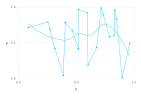

In [10]:
#plot(x=X, y=Y)
#plot(x=X, y=Y, Geom.point)
#plot(x=X, y=Y, Geom.line)
#plot(x=X, y=Y, Geom.smooth)
plot(x=X, y=Y, Geom.point, Geom.smooth, Geom.line)

## Plotting Higher Dimensions 

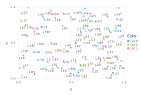

In [16]:
c = floor(Integer, rand(100)*3)
#cm = map(x -> "cat $x", c)
plot(x=rand(100), y=rand(100), color=cm , Geom.point)
labels = map(x->"L$x", 1:100)
plot(x=rand(100), y=rand(100), color=cm, label=labels , Geom.point, Geom.label)

## Gadfly and DataFrames

In [17]:
using DataFrames
using RDatasets

  likely near /home/florian/.julia/v0.4/RDatasets/src/dataset.jl:1
  likely near /home/florian/.julia/v0.4/RDatasets/src/dataset.jl:1
  likely near /home/florian/.julia/v0.4/RDatasets/src/datasets.jl:1


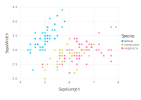

In [22]:
data = dataset("datasets", "iris")
plot(data, x = "SepalLength", y="SepalWidth", color="Species", Geom.point)

## Interacting

In [23]:
using Interact

  likely near /home/florian/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/florian/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/florian/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/florian/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/florian/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


Interact.Slider{Float64}([Reactive.Input{Float64}] 5.0,"a",5.0,0.0:0.01:10.0)

Interact.Slider{Float64}([Reactive.Input{Float64}] 5.0,"b",5.0,0.0:0.1:10.0)

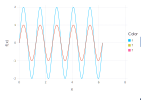

In [24]:
@manipulate for a=0.0:0.01:10 ,b=0:0.1:10 
    plot(
    [x -> sin(x*a)+sin(x*b), x -> sin(x*a), x-> sin(x*b)]
    , 0, 2.0*pi)
end

## Geometries

### Bars

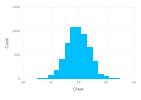

In [27]:
plot(dataset("HistData", "ChestSizes"), x="Chest", y="Count", Geom.bar)

### Boxplot

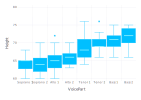

In [28]:
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.boxplot)

### Histograms

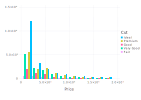

In [28]:
#plot(dataset("ggplot2", "diamonds"), x="Price", Geom.histogram)
#plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.histogram)
#plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.histogram(position=:dodge))
#plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut",  Geom.histogram(bincount=20))
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut",  Geom.histogram(bincount=10, position=:dodge))


### Histogram 2D

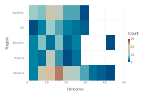

In [30]:
#plot(dataset("car", "Womenlf"), x="HIncome", y="Region", Geom.histogram2d)
plot(dataset("car", "Womenlf"), x="HIncome", y="Region", Geom.histogram2d(xbincount=10))

### Rectbin

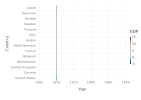

In [34]:
dataset("Zelig", "macro")
plot(dataset("Zelig", "macro"), x="Year", y="Country", color="GDP", Geom.rectbin)

### Layers

### Subplot Grids

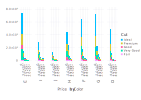

In [34]:
dataset("ggplot2", "diamonds")
#plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.histogram)
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", xgroup="Color", Geom.subplot_grid(Geom.histogram(bincount=5)))

## Scales

Interact.Options{:ToggleButtons,Function}([Reactive.Input{Function}] f,"scale",f,"continuous",Interact.OptionDict(Any["continuous","log","sqrt"],Dict{Any,Any}("log"=>f,"sqrt"=>f,"continuous"=>f)),Any[],Any[])

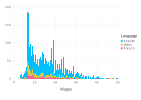

In [35]:
@manipulate for scale=Dict(
        :continuous => Scale.y_continuous, 
        :log => Scale.y_log, 
        :sqrt => Scale.y_sqrt
    )
    plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram, scale)
end

## Plot IO

In [ ]:
draw(SVG("myplot.svg", 4inch, 3inch), myplot)
#draw(PNG("myplot.png", 4inch, 3inch), myplot)
#draw(PDF("myplot.pdf", 4inch, 3inch), myplot)
#draw(PS("myplot.ps", 4inch, 3inch), myplot)
#draw(D3("myplot.js", 4inch, 3inch), myplot)

## Tips and Tricks

In [ ]:
data=readtable("glomeruli_cluster_correlation.csv", separator=';')
plot(data, x="glomeruli", y="cluster", color="dice", Geom.rectbin)

## 